JOB DONE 0:00:06.238752


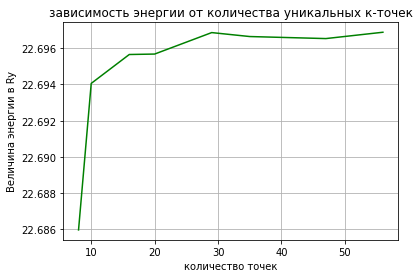

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
start_time = datetime.now()
output = open('x.txt', 'w')
output = open('y.txt', 'w')
with open('C.scf.in') as f:
    lines = f.readlines()
for cut in ['4 4 4  0 0 0', '5 5 5  0 0 0', '6 6 6  0 0 0', '7 7 7  0 0 0', '8 8 8  0 0 0', '9 9 9  0 0 0', '10 10 10  0 0 0', '11 11 11  0 0 0']:
    lines[28] = '{}'.format(cut)
    with open('input.in', 'w') as f:
        for l in lines:
             f.write(l)
    os.system('../bin/pw.x < input.in > output.txt')
    with open ('output.txt')as f:
        for l in f.readlines():
            if '!' in l:
                #print(l[38:50])
                output = open('y.txt', 'a')
                print(l[38:50], file= output )
                output.close()
    with open ('output.txt')as f:
        for d in f.readlines():
            if 'number of k points=' in d:
                #print(d[28:30])
                output = open('x.txt', 'a' )
                print(d[28:30], file= output)
                output.close()
                # да, это можно сделать красивее, но я и так потратил кучу времени совсем не на то, что было нужно :)
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
plt.title('зависимость энергии от количества уникальных к-точек')
plt.xlabel('количество точек')
plt.ylabel('Величина энергии в Ry')
plt.grid()
plt.plot(x, y, 'g')
plt.savefig('result.jpg')
time.sleep(1)
print('JOB DONE', datetime.now() - start_time)

    Пояснения: как в первой задаче мы видим, что увеличение к-точек предполагает "уплотнение", что дает нам увеличение точности расчетов. Однако использовать при расчетах более, чем 30 уникальных к-точек не имеет смысла - точность расчета не увеличивается, в то время как увеличиваются ресурсозатраты на расчет.

 &CONTROL
                 calculation = 'scf' ,
                restart_mode = 'from_scratch' ,
                      outdir = '/mnt/d/qe-6.5/task1/' ,
                  pseudo_dir = '/mnt/d/qe-6.5/task1/' ,
                      prefix = 'diamond' ,
                     tstress = .true. ,
                     tprnfor = .true. ,
 /
 &SYSTEM
                       ibrav = 2,
                   celldm(1) = 6.6,
                         nat = 2,
                        ntyp = 1,
                     ecutwfc = 40 ,
 /
 &ELECTRONS
                    conv_thr = 1.0d-8 ,
                 mixing_mode = 'plain' ,
                 mixing_beta = 0.7 ,
             diagonalization = 'david' ,
 /
ATOMIC_SPECIES
    C   12.01100  C.pz-vbc.UPF 
ATOMIC_POSITIONS 
    C      0.000000000    0.000000000    0.000000000    
    C      0.250000000    0.250000000    0.250000000    
K_POINTS {automatic}
   6 6 6   0 0 0

     Program PWSCF v.6.5 starts on 19May2020 at 22:38:25 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on     1 processors

     MPI processes distributed on     1 nodes
     Waiting for input...
     Reading input from standard input
     Message from routine read_cards :
     DEPRECATED: no units specified in ATOMIC_POSITIONS card
     Message from routine read_cards :
     ATOMIC_POSITIONS: units set to alat

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3

     Subspace diagonalization in iterative solution of the eigenvalue problem:
     a serial algorithm will be used


     G-vector sticks info
     --------------------
     sticks:   dense  smooth     PW     G-vecs:    dense   smooth      PW
     Sum         241     241     85                 2445     2445     531



     bravais-lattice index     =            2
     lattice parameter (alat)  =       6.6000  a.u.
     unit-cell volume          =      71.8740 (a.u.)^3
     number of atoms/cell      =            2
     number of atomic types    =            1
     number of electrons       =         8.00
     number of Kohn-Sham states=            4
     kinetic-energy cutoff     =      40.0000  Ry
     charge density cutoff     =     160.0000  Ry
     convergence threshold     =      1.0E-08
     mixing beta               =       0.7000
     number of iterations used =            8  plain     mixing
     Exchange-correlation=  SLA  PZ   NOGX NOGC
                           (   1   1   0   0   0   0   0)

     celldm(1)=   6.600000  celldm(2)=   0.000000  celldm(3)=   0.000000
     celldm(4)=   0.000000  celldm(5)=   0.000000  celldm(6)=   0.000000

     crystal axes: (cart. coord. in units of alat)
               a(1) = (  -0.500000   0.000000   0.500000 )  
               a(2) = (   0.000000   0.500000   0.500000 )  
               a(3) = (  -0.500000   0.500000   0.000000 )  

     reciprocal axes: (cart. coord. in units 2 pi/alat)
               b(1) = ( -1.000000 -1.000000  1.000000 )  
               b(2) = (  1.000000  1.000000  1.000000 )  
               b(3) = ( -1.000000  1.000000 -1.000000 )  


     PseudoPot. # 1 for C  read from file:
     /mnt/d/qe-6.5/task1/C.pz-vbc.UPF
     MD5 check sum: 902016046bf83189dffe9ec1c2a452ce
     Pseudo is Norm-conserving, Zval =  4.0
     Generated by new atomic code, or converted to UPF format
     Using radial grid of  269 points,  1 beta functions with: 
                l(1) =   0

     atomic species   valence    mass     pseudopotential
        C              4.00    12.01100     C ( 1.00)

     48 Sym. Ops., with inversion, found (24 have fractional translation)



   Cartesian axes

     site n.     atom                  positions (alat units)
         1           C   tau(   1) = (   0.0000000   0.0000000   0.0000000  )
         2           C   tau(   2) = (   0.2500000   0.2500000   0.2500000  )

     number of k points=    56
                       cart. coord. in units 2pi/alat
        k(    1) = (   0.0000000   0.0000000   0.0000000), wk =   0.0015026
        k(    2) = (  -0.0909091   0.0909091  -0.0909091), wk =   0.0120210
        k(    3) = (  -0.1818182   0.1818182  -0.1818182), wk =   0.0120210
        k(    4) = (  -0.2727273   0.2727273  -0.2727273), wk =   0.0120210
        k(    5) = (  -0.3636364   0.3636364  -0.3636364), wk =   0.0120210
        k(    6) = (  -0.4545455   0.4545455  -0.4545455), wk =   0.0120210
        k(    7) = (   0.0000000   0.1818182   0.0000000), wk =   0.0090158
        k(    8) = (  -0.0909091   0.2727273  -0.0909091), wk =   0.0360631
        k(    9) = (  -0.1818182   0.3636364  -0.1818182), wk =   0.0360631
        k(   10) = (  -0.2727273   0.4545455  -0.2727273), wk =   0.0360631
        k(   11) = (  -0.3636364   0.5454545  -0.3636364), wk =   0.0360631
        k(   12) = (   0.5454545  -0.3636364   0.5454545), wk =   0.0360631
        k(   13) = (   0.4545455  -0.2727273   0.4545455), wk =   0.0360631
        k(   14) = (   0.3636364  -0.1818182   0.3636364), wk =   0.0360631
        k(   15) = (   0.2727273  -0.0909091   0.2727273), wk =   0.0360631
        k(   16) = (   0.1818182  -0.0000000   0.1818182), wk =   0.0180316
        k(   17) = (   0.0000000   0.3636364   0.0000000), wk =   0.0090158
        k(   18) = (  -0.0909091   0.4545455  -0.0909091), wk =   0.0360631
        k(   19) = (  -0.1818182   0.5454545  -0.1818182), wk =   0.0360631
        k(   20) = (  -0.2727273   0.6363636  -0.2727273), wk =   0.0360631
        k(   21) = (   0.6363636  -0.2727273   0.6363636), wk =   0.0360631
        k(   22) = (   0.5454545  -0.1818182   0.5454545), wk =   0.0360631
        k(   23) = (   0.4545455  -0.0909091   0.4545455), wk =   0.0360631
        k(   24) = (   0.3636364   0.0000000   0.3636364), wk =   0.0180316
        k(   25) = (   0.0000000   0.5454545   0.0000000), wk =   0.0090158
        k(   26) = (  -0.0909091   0.6363636  -0.0909091), wk =   0.0360631
        k(   27) = (  -0.1818182   0.7272727  -0.1818182), wk =   0.0360631
        k(   28) = (   0.7272727  -0.1818182   0.7272727), wk =   0.0360631
        k(   29) = (   0.6363636  -0.0909091   0.6363636), wk =   0.0360631
        k(   30) = (   0.5454545   0.0000000   0.5454545), wk =   0.0180316
        k(   31) = (   0.0000000   0.7272727   0.0000000), wk =   0.0090158
        k(   32) = (  -0.0909091   0.8181818  -0.0909091), wk =   0.0360631
        k(   33) = (   0.8181818  -0.0909091   0.8181818), wk =   0.0360631
        k(   34) = (   0.7272727   0.0000000   0.7272727), wk =   0.0180316
        k(   35) = (   0.0000000   0.9090909   0.0000000), wk =   0.0090158
        k(   36) = (   0.9090909  -0.0000000   0.9090909), wk =   0.0180316
        k(   37) = (  -0.1818182   0.3636364   0.0000000), wk =   0.0360631
        k(   38) = (  -0.2727273   0.4545455  -0.0909091), wk =   0.0721262
        k(   39) = (  -0.3636364   0.5454545  -0.1818182), wk =   0.0721262
        k(   40) = (   0.5454545  -0.3636364   0.7272727), wk =   0.0721262
        k(   41) = (  -0.1818182   0.5454545   0.0000000), wk =   0.0360631
        k(   42) = (  -0.2727273   0.6363636  -0.0909091), wk =   0.0721262
        k(   43) = (   0.6363636  -0.2727273   0.8181818), wk =   0.0721262
        k(   44) = (   0.5454545  -0.1818182   0.7272727), wk =   0.0721262
        k(   45) = (   0.4545455  -0.0909091   0.6363636), wk =   0.0721262
        k(   46) = (   0.3636364   0.0000000   0.5454545), wk =   0.0360631
        k(   47) = (  -0.1818182   0.7272727   0.0000000), wk =   0.0360631
        k(   48) = (   0.7272727  -0.1818182   0.9090909), wk =   0.0721262
        k(   49) = (   0.6363636  -0.0909091   0.8181818), wk =   0.0721262
        k(   50) = (   0.5454545   0.0000000   0.7272727), wk =   0.0360631
        k(   51) = (   0.8181818  -0.0909091   1.0000000), wk =   0.0360631
        k(   52) = (   0.7272727   0.0000000   0.9090909), wk =   0.0360631
        k(   53) = (   0.6363636  -0.2727273   1.0000000), wk =   0.0360631
        k(   54) = (   0.5454545  -0.1818182   0.9090909), wk =   0.0721262
        k(   55) = (   0.6363636  -0.0909091   1.0000000), wk =   0.0360631
        k(   56) = (   0.5454545   0.0000000   0.9090909), wk =   0.0360631

     Dense  grid:     2445 G-vectors     FFT dimensions: (  20,  20,  20)

     Estimated max dynamical RAM per process >       2.82 MB

     Initial potential from superposition of free atoms

     starting charge    7.99994, renormalised to    8.00000
     Starting wfcs are    8 randomized atomic wfcs

     total cpu time spent up to now is        0.1 secs

     Self-consistent Calculation

     iteration #  1     ecut=    40.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.00E-02,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.2 secs

     total energy              =     -22.68455299 Ry
     Harris-Foulkes estimate   =     -22.75555379 Ry
     estimated scf accuracy    <       0.13653649 Ry

     iteration #  2     ecut=    40.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.71E-03,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.2 secs

     total energy              =     -22.69639269 Ry
     Harris-Foulkes estimate   =     -22.69695665 Ry
     estimated scf accuracy    <       0.00213157 Ry

     iteration #  3     ecut=    40.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  2.66E-05,  avg # of iterations =  2.2

     total cpu time spent up to now is        0.3 secs

     total energy              =     -22.69686178 Ry
     Harris-Foulkes estimate   =     -22.69687057 Ry
     estimated scf accuracy    <       0.00007357 Ry

     iteration #  4     ecut=    40.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  9.20E-07,  avg # of iterations =  2.2

     total cpu time spent up to now is        0.4 secs

     total energy              =     -22.69687827 Ry
     Harris-Foulkes estimate   =     -22.69688033 Ry
     estimated scf accuracy    <       0.00000351 Ry

     iteration #  5     ecut=    40.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  4.39E-08,  avg # of iterations =  2.4

     total cpu time spent up to now is        0.5 secs

     total energy              =     -22.69687946 Ry
     Harris-Foulkes estimate   =     -22.69687948 Ry
     estimated scf accuracy    <       0.00000005 Ry

     iteration #  6     ecut=    40.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  6.49E-10,  avg # of iterations =  2.6

     total cpu time spent up to now is        0.5 secs

     End of self-consistent calculation

          k = 0.0000 0.0000 0.0000 (   331 PWs)   bands (ev):

    -7.7995  14.4799  14.4799  14.4799

          k =-0.0909 0.0909-0.0909 (   316 PWs)   bands (ev):

    -7.5600  13.0110  14.1196  14.1196

          k =-0.1818 0.1818-0.1818 (   311 PWs)   bands (ev):

    -6.8475  10.0035  13.2736  13.2736

          k =-0.2727 0.2727-0.2727 (   305 PWs)   bands (ev):

    -5.6694   6.7438  12.4570  12.4570

          k =-0.3636 0.3636-0.3636 (   308 PWs)   bands (ev):

    -4.0581   3.6135  11.8655  11.8655

          k =-0.4545 0.4545-0.4545 (   308 PWs)   bands (ev):

    -2.1516   0.9446  11.5398  11.5398

          k = 0.0000 0.1818 0.0000 (   315 PWs)   bands (ev):

    -7.4801  13.3711  13.3711  13.8319

          k =-0.0909 0.2727-0.0909 (   309 PWs)   bands (ev):

    -6.9239  11.0352  12.4170  13.3839

          k =-0.1818 0.3636-0.1818 (   306 PWs)   bands (ev):

    -5.9036   7.9083  11.6365  12.5695

          k =-0.2727 0.4545-0.2727 (   303 PWs)   bands (ev):

    -4.4353   4.7813  11.1415  11.6938

          k =-0.3636 0.5455-0.3636 (   309 PWs)   bands (ev):

    -2.5948   1.9373  10.9846  10.9894

          k = 0.5455-0.3636 0.5455 (   309 PWs)   bands (ev):

    -1.4705   0.5763  10.5428  11.1934

          k = 0.4545-0.2727 0.4545 (   310 PWs)   bands (ev):

    -3.2415   2.8327  10.4374  11.7436

          k = 0.3636-0.1818 0.3636 (   308 PWs)   bands (ev):

    -4.9741   5.8123  10.6844  12.5314

          k = 0.2727-0.0909 0.2727 (   310 PWs)   bands (ev):

    -6.2961   8.9834  11.2810  13.4229

          k = 0.1818-0.0000 0.1818 (   315 PWs)   bands (ev):

    -7.1626  11.8383  12.3114  14.1132

          k = 0.0000 0.3636 0.0000 (   303 PWs)   bands (ev):

    -6.5278  11.3933  11.3933  11.9215

          k =-0.0909 0.4545-0.0909 (   304 PWs)   bands (ev):

    -5.6667   9.0377  10.5599  11.3001

          k =-0.1818 0.5455-0.1818 (   311 PWs)   bands (ev):

    -4.3624   6.1346  10.0610  10.3108

          k =-0.2727 0.6364-0.2727 (   309 PWs)   bands (ev):

    -2.6455   3.3202   9.3212   9.9586

          k = 0.6364-0.2727 0.6364 (   305 PWs)   bands (ev):

    -0.9188   1.1548   8.5571  10.2443

          k = 0.5455-0.1818 0.5455 (   303 PWs)   bands (ev):

    -2.0156   2.5117   8.1116  10.8973

          k = 0.4545-0.0909 0.4545 (   309 PWs)   bands (ev):

    -3.8308   5.2463   8.0676  11.8064

          k = 0.3636 0.0000 0.3636 (   305 PWs)   bands (ev):

    -5.2848   7.9349   8.7466  12.7886

          k = 0.0000 0.5455 0.0000 (   311 PWs)   bands (ev):

    -4.9765   9.2105   9.6498   9.6498

          k =-0.0909 0.6364-0.0909 (   314 PWs)   bands (ev):

    -3.8227   7.0982   8.8031   9.0818

          k =-0.1818 0.7273-0.1818 (   307 PWs)   bands (ev):

    -2.2528   4.7462   7.5166   8.9163

          k = 0.7273-0.1818 0.7273 (   306 PWs)   bands (ev):

    -0.4421   2.4900   6.3755   9.1732

          k = 0.6364-0.0909 0.6364 (   303 PWs)   bands (ev):

    -0.4893   2.6259   5.6333   9.8293

          k = 0.5455 0.0000 0.5455 (   303 PWs)   bands (ev):

    -2.2777   4.7530   5.6809  10.7648

          k = 0.0000 0.7273 0.0000 (   314 PWs)   bands (ev):

    -2.8293   6.0790   8.4191   8.4191

          k =-0.0909 0.8182-0.0909 (   310 PWs)   bands (ev):

    -1.4206   4.4675   7.3155   8.1579

          k = 0.8182-0.0909 0.8182 (   307 PWs)   bands (ev):

     0.3082   2.9880   5.5144   8.3308

          k = 0.7273 0.0000 0.7273 (   304 PWs)   bands (ev):

     1.0123   2.5658   4.2640   8.9126

          k = 0.0000 0.9091 0.0000 (   310 PWs)   bands (ev):

    -0.1731   2.8584   7.7855   7.7855

          k = 0.9091-0.0000 0.9091 (   310 PWs)   bands (ev):

     1.3905   1.4537   6.8979   7.8446

          k =-0.1818 0.3636 0.0000 (   308 PWs)   bands (ev):

    -6.2183   9.8270  10.4681  12.8638

          k =-0.2727 0.4545-0.0909 (   308 PWs)   bands (ev):

    -5.0504   7.0654   9.5819  12.0189

          k =-0.3636 0.5455-0.1818 (   308 PWs)   bands (ev):

    -3.4551   4.1114   9.2553  11.1089

          k = 0.5455-0.3636 0.7273 (   303 PWs)   bands (ev):

    -1.5807   1.5332   9.2388  10.4661

          k =-0.1818 0.5455 0.0000 (   308 PWs)   bands (ev):

    -4.6681   7.9083   8.8017  10.5530

          k =-0.2727 0.6364-0.0909 (   315 PWs)   bands (ev):

    -3.2238   5.4946   8.0208   9.6173

          k = 0.6364-0.2727 0.8182 (   306 PWs)   bands (ev):

    -1.4254   2.9586   7.5627   9.0897

          k = 0.5455-0.1818 0.7273 (   306 PWs)   bands (ev):

    -0.3786   1.7226   7.0455   9.3214

          k = 0.4545-0.0909 0.6364 (   305 PWs)   bands (ev):

    -2.0624   3.8561   6.7581  10.0895

          k = 0.3636 0.0000 0.5455 (   310 PWs)   bands (ev):

    -3.7530   6.2426   7.1586  11.1029

          k =-0.1818 0.7273 0.0000 (   314 PWs)   bands (ev):

    -2.5380   5.7900   7.6239   8.3104

          k = 0.7273-0.1818 0.9091 (   307 PWs)   bands (ev):

    -0.8756   4.0837   6.2836   7.8985

          k = 0.6364-0.0909 0.8182 (   302 PWs)   bands (ev):

     0.7051   2.5238   5.0901   8.2358

          k = 0.5455 0.0000 0.7273 (   306 PWs)   bands (ev):

    -0.3670   3.5867   4.7420   9.0203

          k = 0.8182-0.0909 1.0000 (   308 PWs)   bands (ev):

     0.0869   3.0130   7.0713   7.2176

          k = 0.7273 0.0000 0.9091 (   306 PWs)   bands (ev):

     1.6355   1.9454   5.4282   7.4672

          k = 0.6364-0.2727 1.0000 (   309 PWs)   bands (ev):

    -1.6792   4.8222   6.0805   8.5209

          k = 0.5455-0.1818 0.9091 (   306 PWs)   bands (ev):

     0.0796   2.9829   5.7291   7.6737

          k = 0.6364-0.0909 1.0000 (   301 PWs)   bands (ev):

     0.7846   3.1787   5.7046   6.3834

          k = 0.5455 0.0000 0.9091 (   312 PWs)   bands (ev):

     1.5440   2.7008   4.8158   6.5473

     highest occupied level (ev):    14.4799

!    total energy              =     -22.69687948 Ry
     Harris-Foulkes estimate   =     -22.69687948 Ry
     estimated scf accuracy    <          1.5E-09 Ry

     The total energy is the sum of the following terms:

     one-electron contribution =       8.79573878 Ry
     hartree contribution      =       1.78106106 Ry
     xc contribution           =      -7.15587038 Ry
     ewald contribution        =     -26.11780894 Ry

     convergence has been achieved in   6 iterations

     Forces acting on atoms (cartesian axes, Ry/au):

     atom    1 type  1   force =     0.00000000   -0.00000000    0.00000000
     atom    2 type  1   force =    -0.00000000    0.00000000   -0.00000000

     Total force =     0.000000     Total SCF correction =     0.000000


     Computing stress (Cartesian axis) and pressure

          total   stress  (Ry/bohr**3)                   (kbar)     P=     -262.89
  -0.00178708   0.00000000   0.00000000         -262.89        0.00        0.00
  -0.00000000  -0.00178708  -0.00000000           -0.00     -262.89       -0.00
   0.00000000  -0.00000000  -0.00178708            0.00       -0.00     -262.89


     Writing output data file /mnt/d/qe-6.5/task1/diamond.save/

     init_run     :      0.06s CPU      0.06s WALL (       1 calls)
     electrons    :      0.42s CPU      0.48s WALL (       1 calls)
     forces       :      0.02s CPU      0.00s WALL (       1 calls)
     stress       :      0.00s CPU      0.01s WALL (       1 calls)

     Called by init_run:
     wfcinit      :      0.05s CPU      0.05s WALL (       1 calls)
     potinit      :      0.00s CPU      0.00s WALL (       1 calls)
     hinit0       :      0.02s CPU      0.01s WALL (       1 calls)

     Called by electrons:
     c_bands      :      0.39s CPU      0.41s WALL (       6 calls)
     sum_band     :      0.03s CPU      0.05s WALL (       6 calls)
     v_of_rho     :      0.00s CPU      0.00s WALL (       7 calls)
     mix_rho      :      0.00s CPU      0.00s WALL (       6 calls)

     Called by c_bands:
     init_us_2    :      0.02s CPU      0.01s WALL (     840 calls)
     cegterg      :      0.36s CPU      0.39s WALL (     336 calls)

     Called by sum_band:

     Called by *egterg:
     h_psi        :      0.30s CPU      0.31s WALL (    1137 calls)
     g_psi        :      0.00s CPU      0.01s WALL (     745 calls)
     cdiaghg      :      0.03s CPU      0.03s WALL (    1081 calls)

     Called by h_psi:
     h_psi:calbec :      0.00s CPU      0.01s WALL (    1137 calls)
     vloc_psi     :      0.30s CPU      0.28s WALL (    1137 calls)
     add_vuspsi   :      0.00s CPU      0.01s WALL (    1137 calls)

     General routines
     calbec       :      0.02s CPU      0.01s WALL (    1417 calls)
     fft          :      0.00s CPU      0.00s WALL (      25 calls)
     ffts         :      0.00s CPU      0.00s WALL (       6 calls)
     fftw         :      0.25s CPU      0.25s WALL (    9904 calls)

     Parallel routines

     PWSCF        :      0.50s CPU      0.58s WALL


   This run was terminated on:  22:38:26  19May2020            

=------------------------------------------------------------------------------=
   JOB DONE.
=------------------------------------------------------------------------------=